### Dataset:
https://www.kaggle.com/chriszola/xray-lung-image-dataset

### Importing Libraries

In [28]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Setting Train Directory

In [29]:
DATASET_DIR = "C:/Users/ronel/OneDrive/Documents/Projects/X-RayImageDataSet/Train"

### Plotting Images of Covid & Normal Lungs

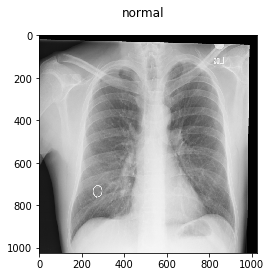

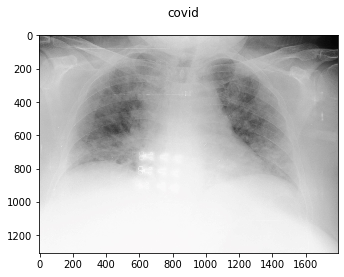

In [30]:
normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 

### Setting Sequential Model Parameters

In [31]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 5

In [32]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_17 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 41472)            

### Creating Train, Test, 7 Validation Sets

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

test_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

TEST_DIR = "C:/Users/ronel/OneDrive/Documents/Projects/X-RayImageDataSet/Test"
test_generator = test_datagen.flow_from_directory(
    TEST_DIR, 
    target_size =(IMG_H, IMG_W),
    batch_size =BATCH_SIZE,
    class_mode ='binary',
    shuffle= False)

Found 314 images belonging to 2 classes.
Found 132 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


### Running Model

In [34]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Epoch 1/48
62/62 [==============================] - 17s 276ms/step - loss: 1.8666 - accuracy: 0.6602 - val_loss: 0.7667 - val_accuracy: 0.5615
Epoch 2/48
62/62 [==============================] - 16s 262ms/step - loss: 0.4582 - accuracy: 0.8123 - val_loss: 0.6181 - val_accuracy: 0.7615
Epoch 3/48
62/62 [==============================] - 16s 261ms/step - loss: 0.4865 - accuracy: 0.8026 - val_loss: 1.0965 - val_accuracy: 0.6000
Epoch 4/48
62/62 [==============================] - 17s 272ms/step - loss: 0.3758 - accuracy: 0.8479 - val_loss: 0.6097 - val_accuracy: 0.7846
Epoch 5/48
62/62 [==============================] - 19s 301ms/step - loss: 0.3948 - accuracy: 0.8613 - val_loss: 0.5039 - val_accuracy: 0.8308
Epoch 6/48
62/62 [==============================] - 19s 312ms/step - loss: 0.3873 - accuracy: 0.9061 - val_loss: 0.4581 - val_accuracy: 0.8077
Epoch 7/48
62/62 [==============================] - 19s 312ms/step - loss: 0.5225 - accuracy: 0.8706 - val_loss: 0.4527 - val_accuracy: 0.8538

### Plotting Train/Validation Loss & Accuracy

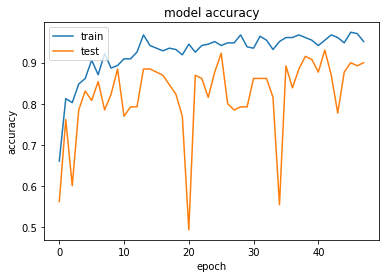

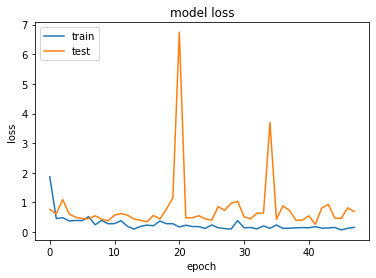

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predicting Test Set

In [37]:
label = test_generator.classes
pred= model.predict(test_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(predicted_class_indices,label)
cf

array([[50, 50],
       [ 0,  0]], dtype=int64)